In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
rg1 = pd.read_csv('C:\\Users\\revan\\Downloads\\day.csv')
rg1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
rg = rg1[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]
rg.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [4]:
#Check the shape of the dataframe and Data variables

print('Rows and Columns -',rg.shape)
print('\nDescription\n\n',rg.describe())

Rows and Columns - (730, 12)

Description

            season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   23.726322   62.765175   12.76362

# Data Handling and Cleaning

In [5]:
#Check the datatypes of all the columns of the dataframe

for i  in rg.columns:
    print(i,'\t\t',': dtype ',rg[i].dtype)

season 		 : dtype  int64
yr 		 : dtype  int64
mnth 		 : dtype  int64
holiday 		 : dtype  int64
weekday 		 : dtype  int64
workingday 		 : dtype  int64
weathersit 		 : dtype  int64
temp 		 : dtype  float64
atemp 		 : dtype  float64
hum 		 : dtype  float64
windspeed 		 : dtype  float64
cnt 		 : dtype  int64


## Missing Value Treatment

In [6]:
#Check the number of null values in the columns

for i in rg.columns:
    print(i,rg[i].isnull().sum())

season 0
yr 0
mnth 0
holiday 0
weekday 0
workingday 0
weathersit 0
temp 0
atemp 0
hum 0
windspeed 0
cnt 0


# Outliers 

In [7]:
##Describing the Data Set

rg.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [8]:
##Plot Box Plot using funtion

def box_plot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

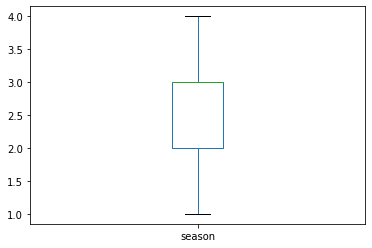

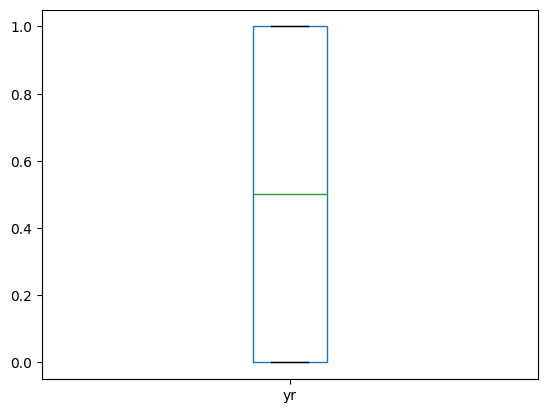

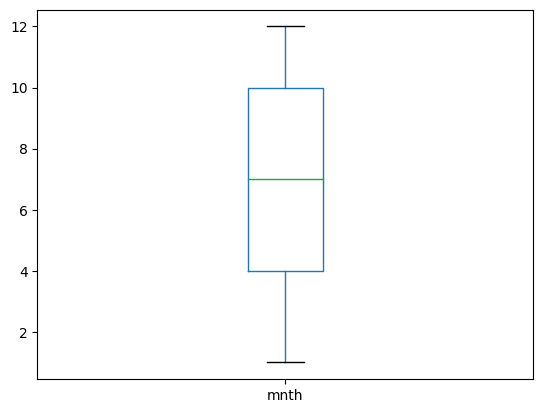

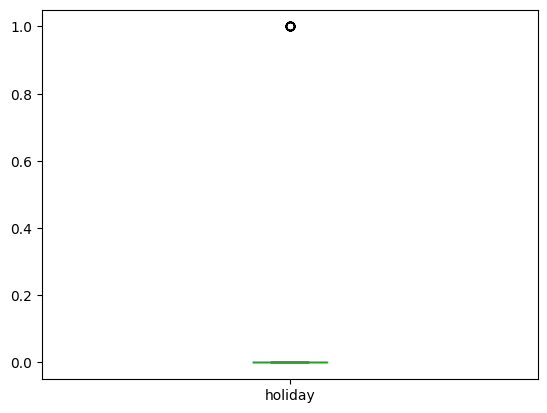

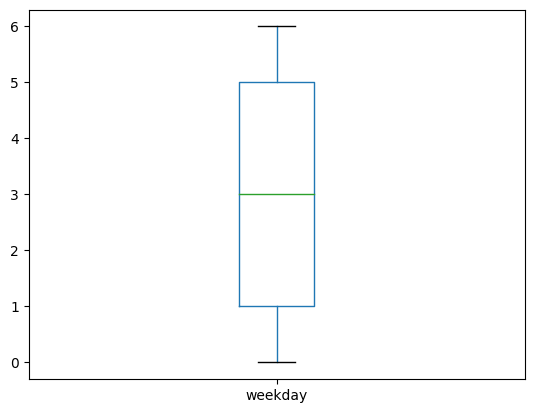

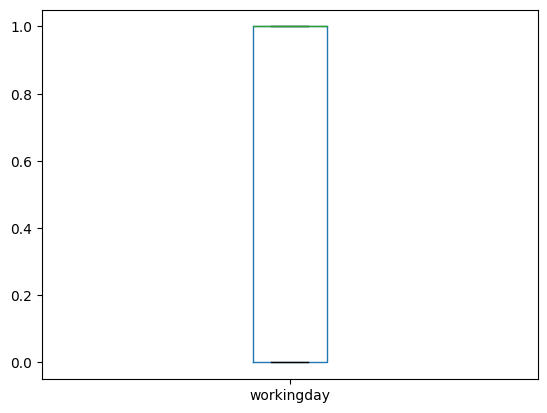

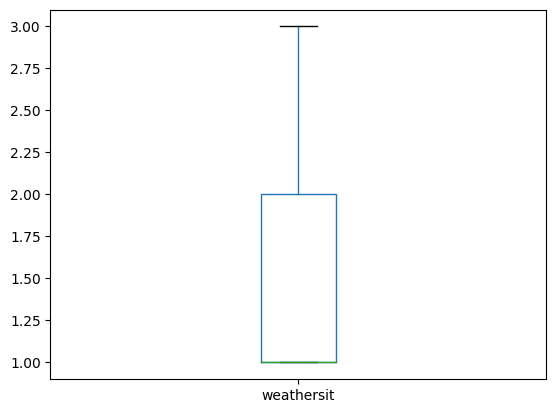

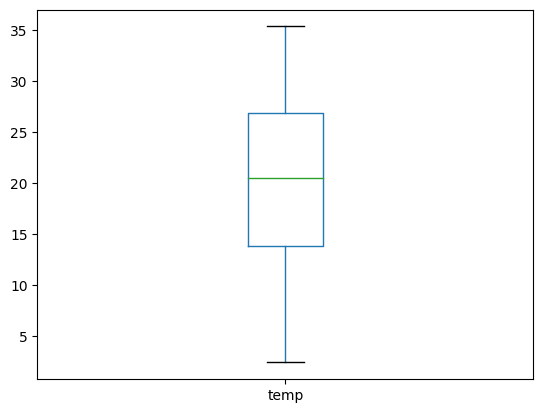

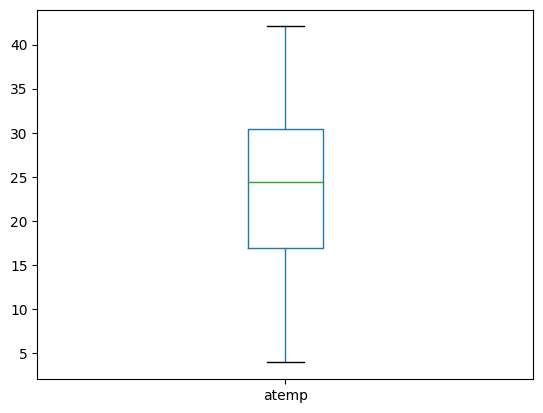

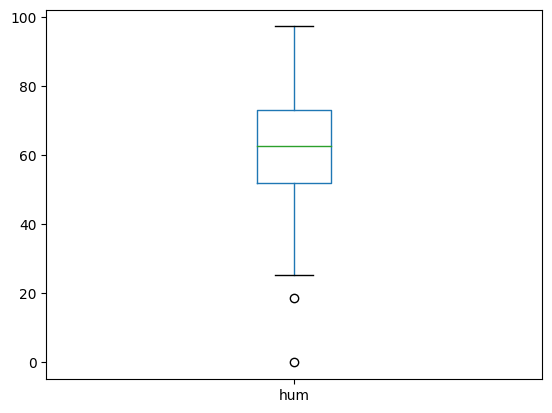

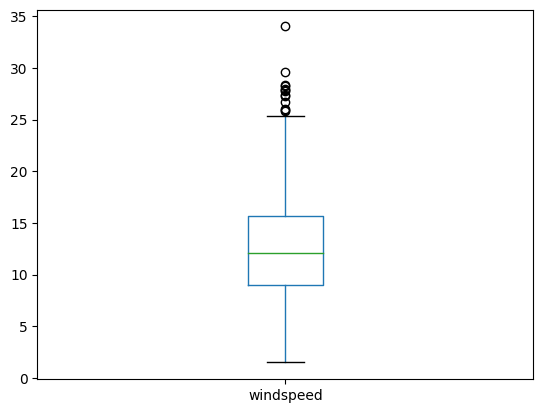

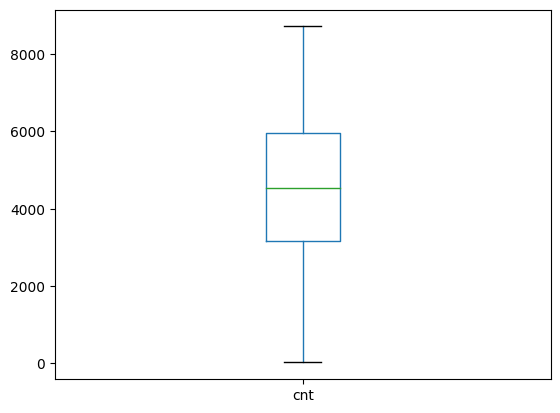

In [9]:
for i in rg.columns:
    box_plot(rg,i)

## Identifying and Removing Outliers

In [10]:
#Define function to identify Outlier

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    
    return ls

In [11]:
#Find the index of the Outliers
rg1 =[]

#for i in [rg.annual_inc,rg.loan_amnt,rg.int_rate,rg.dti]:\
for i in ['hum', 'windspeed']:
    rg1.extend(outliers(rg, i))
print('Outlier rows to be removed -',len(rg1))
print('Total rows remainign -',len(rg)-len(rg1) )

Outlier rows to be removed - 15
Total rows remainign - 715


In [12]:
#remove the outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

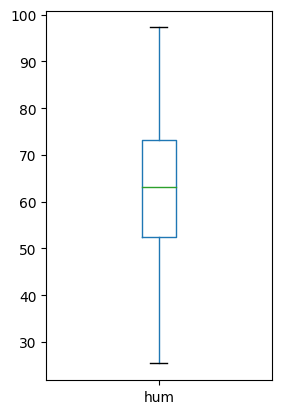

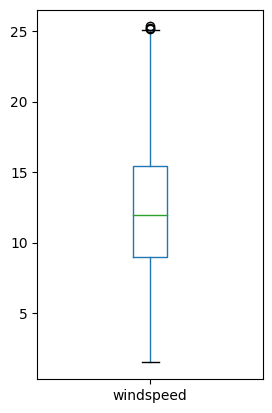

In [13]:
#take rg_1 as new data type which holds the index values of the rows of outliers
j=0
rg = remove(rg, rg1)
for i in ['hum','windspeed']:
    j += 1
    plt.subplot(1,2,j)
    box_plot(rg,i)
    plt.show()

## Divide into categorical variables and numeric variables

In [14]:

category = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

numeric = ['temp', 'atemp','hum','windspeed','cnt']

In [15]:
# convert dtype of categorical variables
rg[category] = rg[category].astype('category')
print(rg.head())
rg.describe()

  season yr mnth holiday weekday workingday weathersit       temp     atemp  \
0      1  0    1       0       6          0          2  14.110847  18.18125   
1      1  0    1       0       0          0          2  14.902598  17.68695   
2      1  0    1       0       1          1          1   8.050924   9.47025   
3      1  0    1       0       2          1          1   8.200000  10.60610   
4      1  0    1       0       3          1          1   9.305237  11.46350   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600  


,temp,atemp,hum,windspeed,cnt
count,716.000000,716.000000,716.000000,716.000000,716.000000
mean,20.400717,23.821520,63.132034,12.481868,4536.613128
std,7.529887,8.159941,13.916864,4.812977,1932.256146
min,2.424346,3.953480,25.416700,1.500244,22.000000
25%,13.828962,16.894537,52.458300,8.989859,3214.000000
50%,20.739153,24.605200,63.083300,11.958797,4572.500000
75%,26.931885,30.556050,73.260425,15.458374,6031.750000
max,35.328347,42.044800,97.250000,25.333236,8714.000000


# Insights described in the readme file

## weathersit : 
		 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

## Season : 
        1: spring 
        2: summer 
        3: fall
        4: winter

##    Year (yr)
        0: 2018
        1: 2019       

## Month (mnth)
    mnth : 1 to 12

# Map the columns to their respective descriptions

In [16]:
# Season
rg['season'] = rg['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# weekday
rg['weekday'] = rg['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})


# month
rg['mnth'] = rg['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

# weathersit
rg['weathersit'] = rg['weathersit'].map({1: 'Clear or Few clouds', 2: 'Mist & Cloudy', 3: 'Light Snow & Rain', 4: 'Heavyrain & ice pallets'})


rg.info()
print(rg.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      716 non-null    category
 1   yr          716 non-null    category
 2   mnth        716 non-null    category
 3   holiday     716 non-null    category
 4   weekday     716 non-null    category
 5   workingday  716 non-null    category
 6   weathersit  716 non-null    category
 7   temp        716 non-null    float64 
 8   atemp       716 non-null    float64 
 9   hum         716 non-null    float64 
 10  windspeed   716 non-null    float64 
 11  cnt         716 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 39.9 KB
   season yr mnth holiday    weekday workingday           weathersit  \
0  spring  0  jan       0   Saturday          0        Mist & Cloudy   
1  spring  0  jan       0     Sunday          0        Mist & Cloudy   
2  spring  0  jan       0  

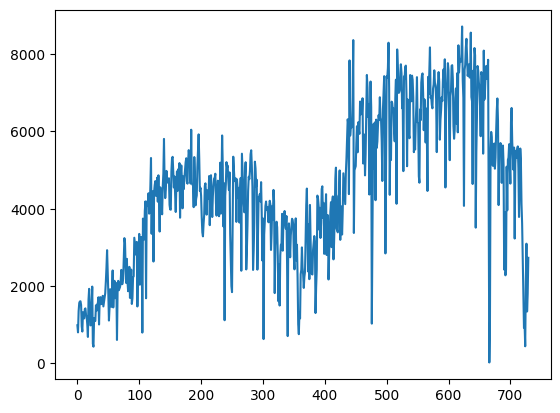

In [17]:
# Univariate Analysis

plt.plot(rg.cnt)
plt.show()

<Figure size 640x480 with 0 Axes>

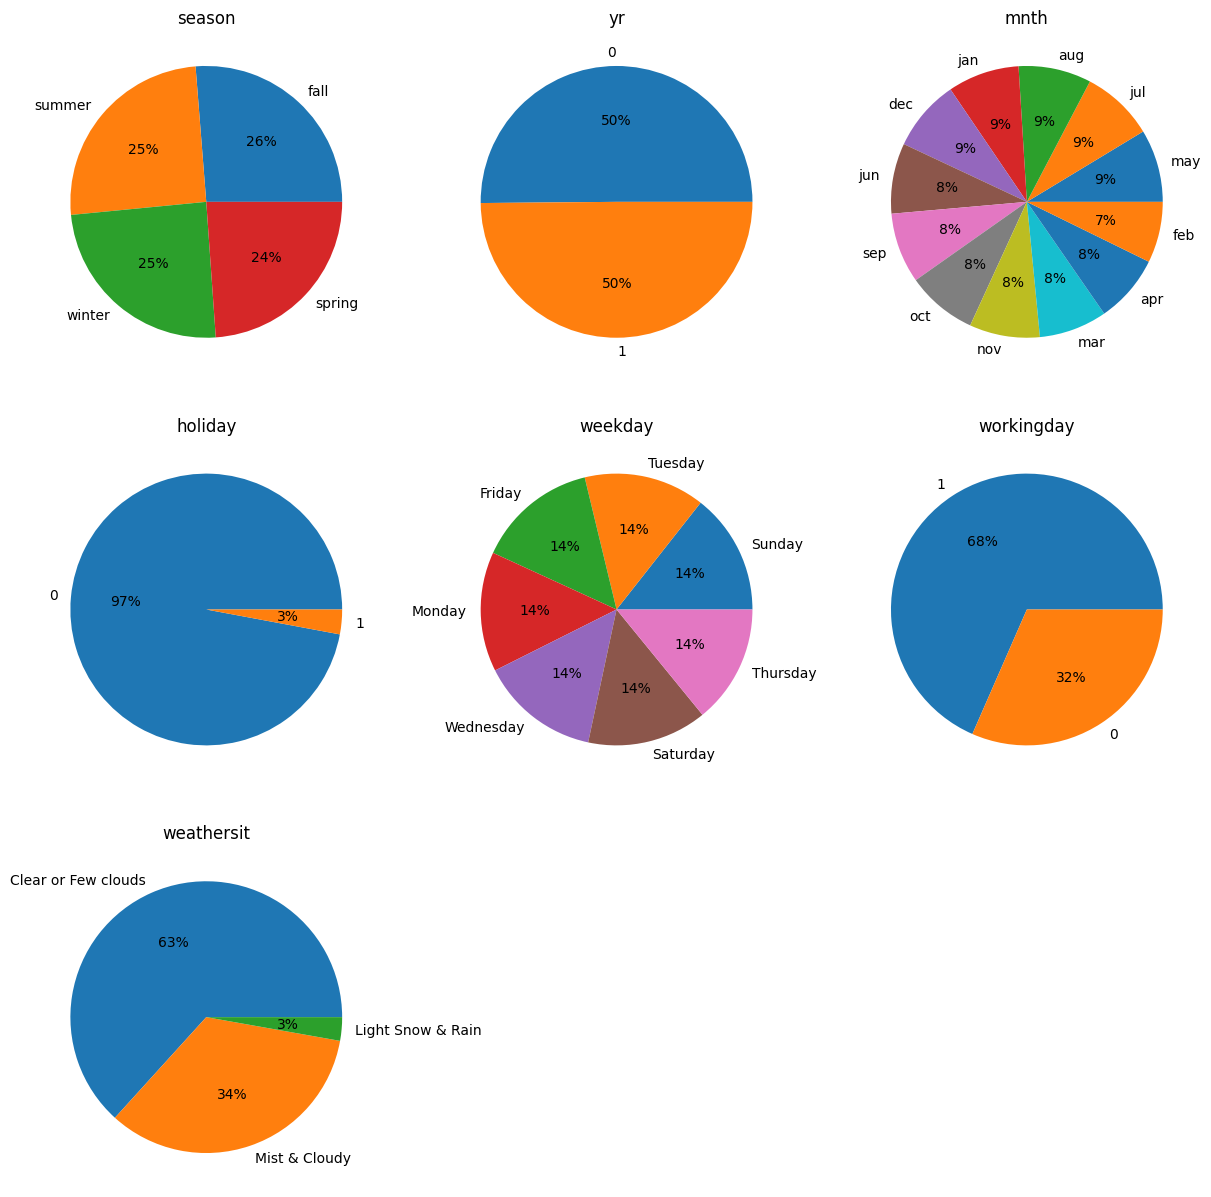

In [18]:
rg_plot=rg.select_dtypes(include='category')



plt.suptitle('Pie hart for categorical features', fontsize=20)
plt.figure(figsize=(15,15))
for i in range(1,rg_plot.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(rg_plot.columns.values[i-1])
    values=rg_plot.iloc[:,i-1].value_counts(normalize=True).values
    index=rg_plot.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.0f%%')
plt.show()

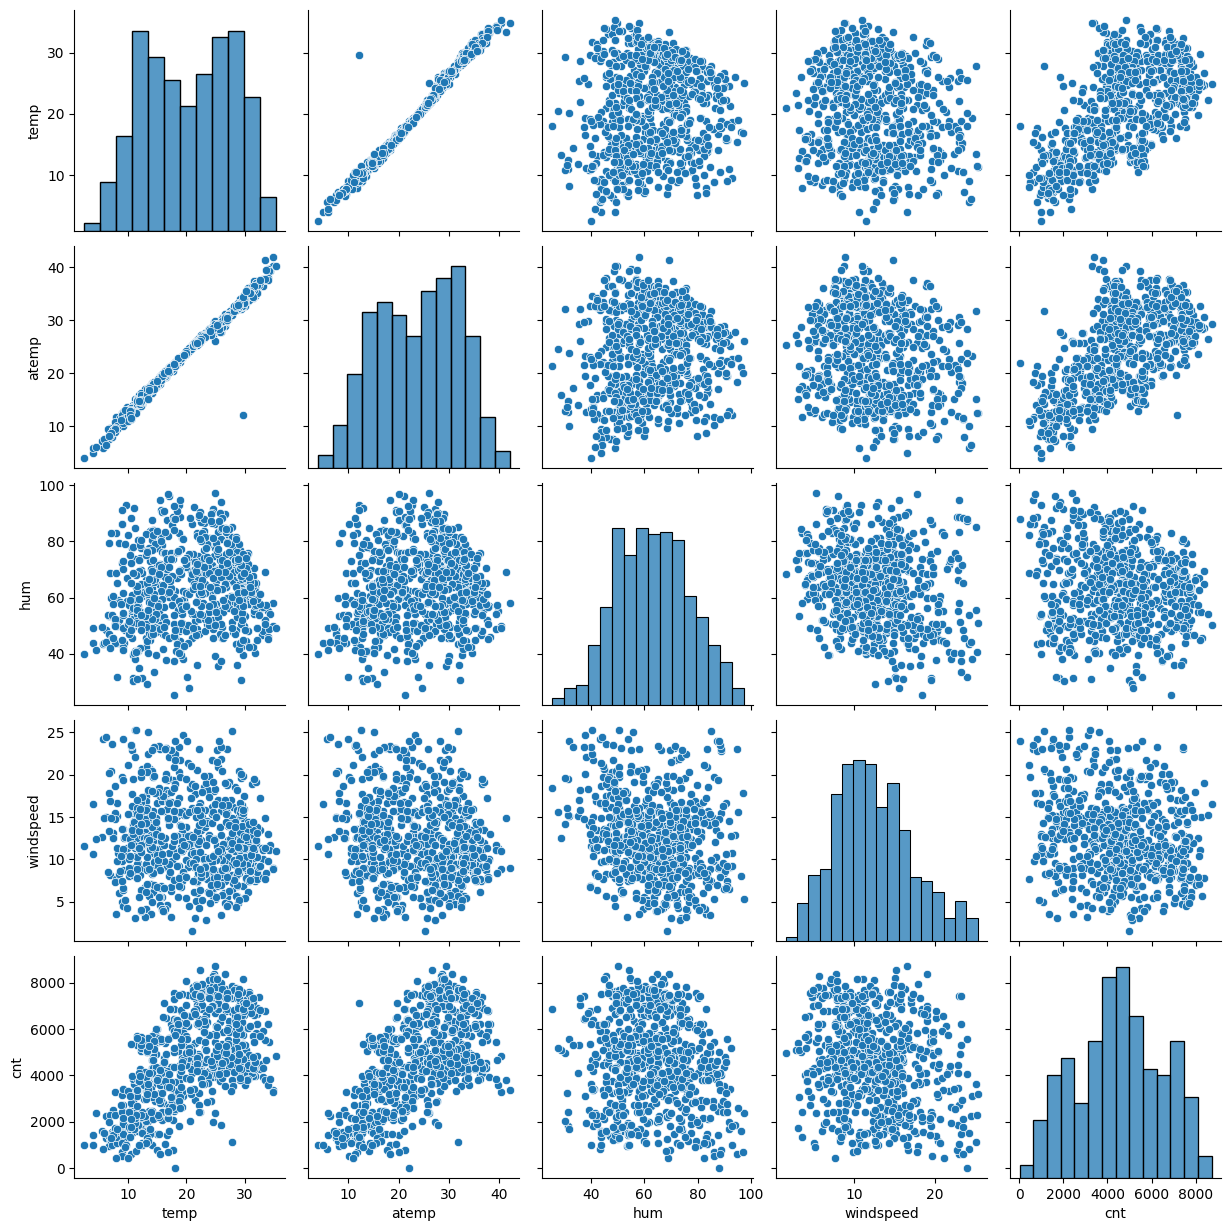

In [19]:
# Bilateral Analysis

sns.pairplot(rg.select_dtypes(['int64','float64']))
plt.show()

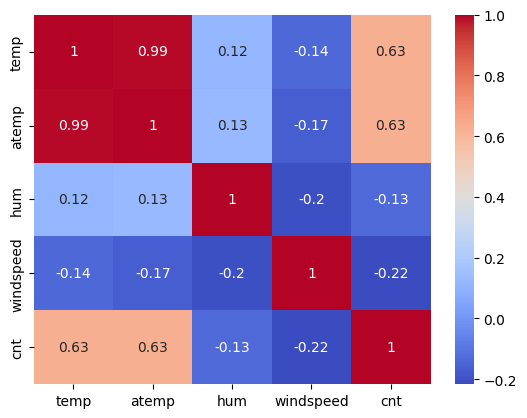

In [20]:
#Heat map

sns.heatmap(rg.corr(), annot=True, cmap='coolwarm')
plt.show()

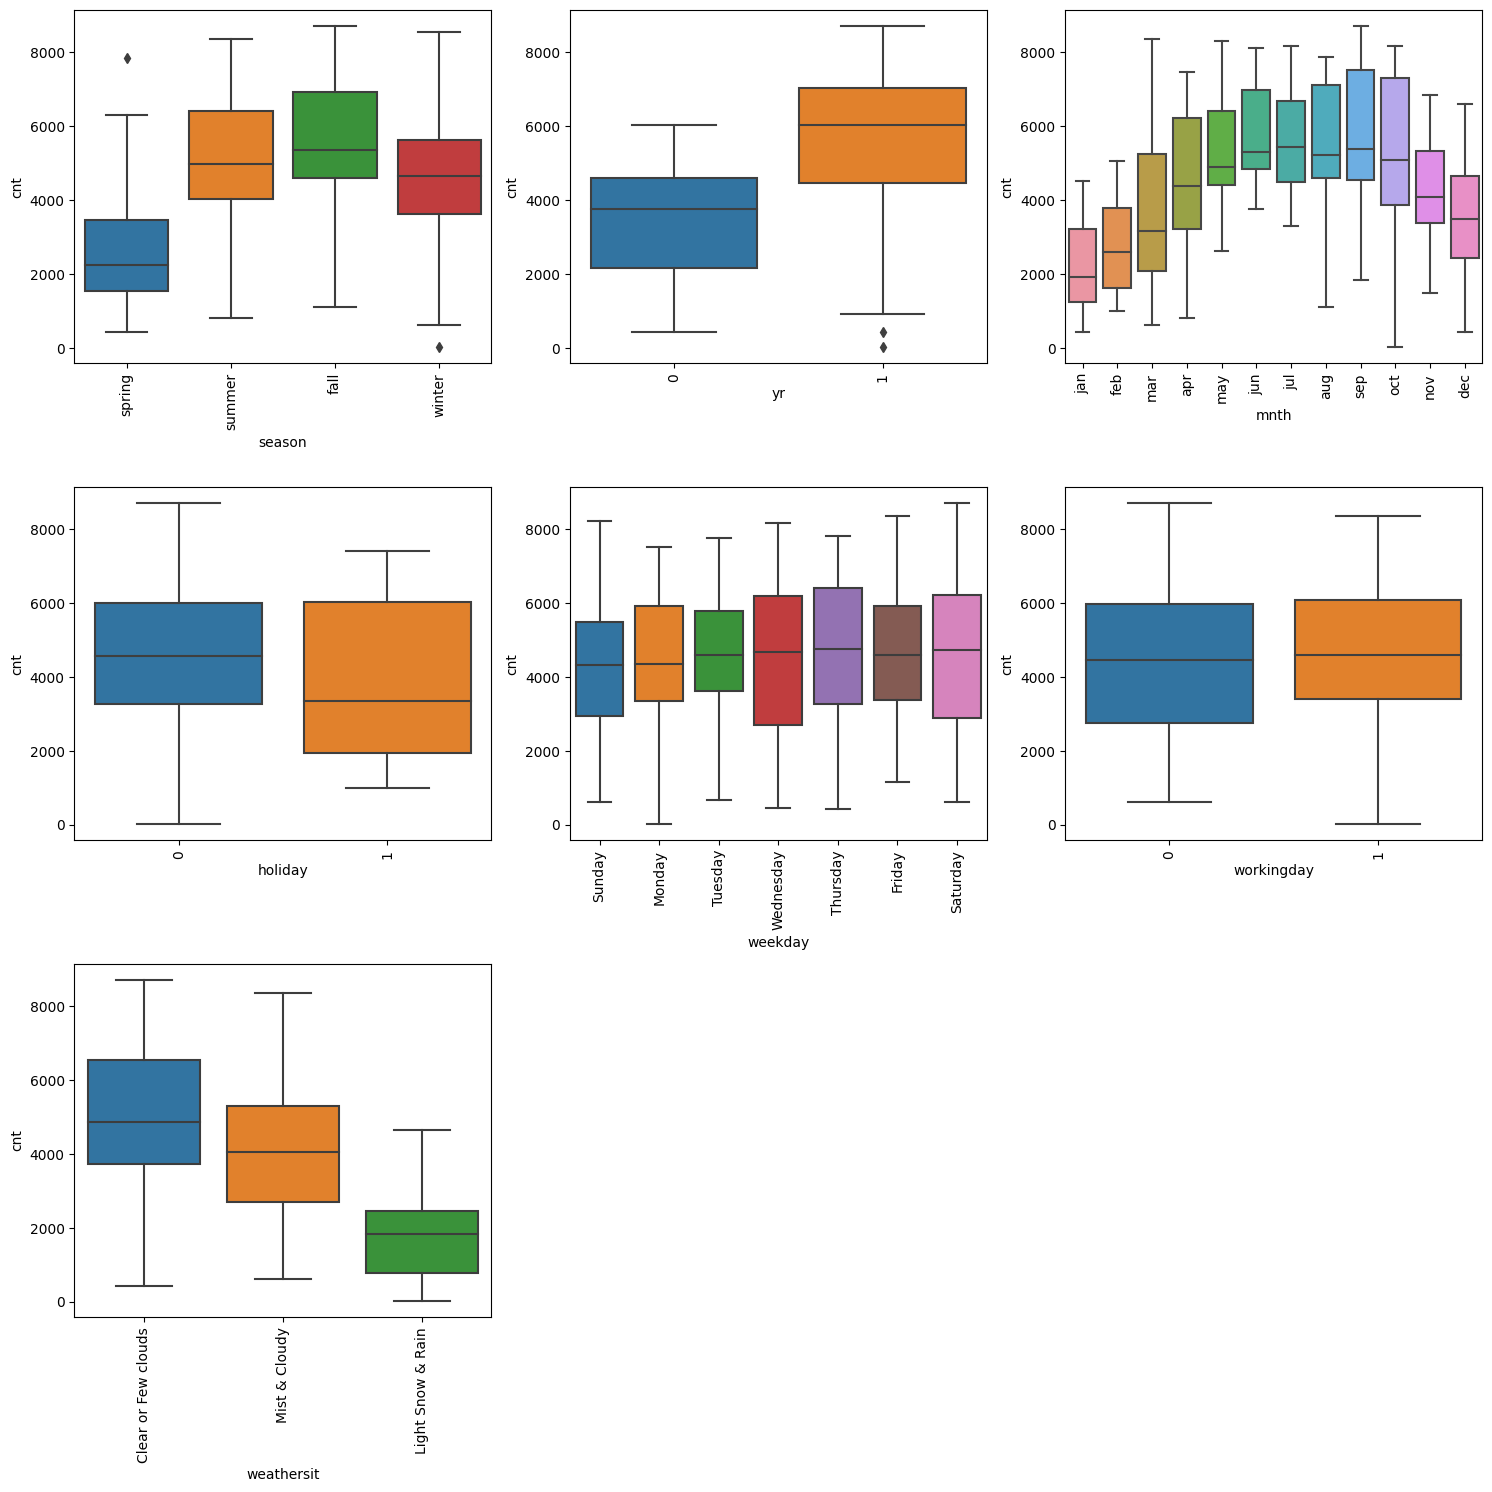

In [21]:
# Box plot for categorical variables
col = 3
row = len(category)//col+1

plt.figure(figsize=(15,15))
for i in list(enumerate(category)):
    plt.subplot(row,col,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = rg)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1)    
plt.show()

1. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

 - The demand for bikes is very less in spring compared to other seasons.
 - The demand for bike is increased in 2019 compared to 2018.
 - Not much difference in demand between working day and non working day.
 - The demand is good  from June to October of the year.
 - Demand is little better on non holiday than compared to holiday.
 - Similar for days of a week, working & non working (not much significant differences)
 - Good demand in Clear or Few clouds and nearly good for Mist and Cloudy, dull on Light Snow and Rain

# Data preparation

## Adding Dummy Variables 

In [22]:

dummy = pd.get_dummies(rg[['season','weekday','mnth','weathersit']],drop_first=True)


rg = pd.concat([rg,dummy], axis = 1)

# drop season column
rg.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

rg.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split train test dataset

In [23]:
#for testing and training , we need to convert all to numerical
rg[['yr','holiday','workingday']]= rg[['yr','holiday','workingday']].astype('uint8')

In [24]:
# Split train test
rg_train, rg_test = train_test_split(rg, train_size = 0.7, random_state = 100 )
print(rg_train.shape,rg_test.shape)

(501, 30) (215, 30)


## Data Scalling 

In [25]:
#Creating a scalar object
scaler = MinMaxScaler()

# fit and transform on training data
rg_train[numeric] = scaler.fit_transform(rg_train[numeric])

#train data
rg_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain
728,1,0,0,0.252441,0.204242,0.293114,0.923102,0.204096,0,0,...,0,0,0,0,0,0,0,1,0,0
541,1,0,1,0.733702,0.689995,0.126342,0.914353,0.853659,0,1,...,0,1,0,0,0,0,0,0,0,0
116,0,0,1,0.719799,0.663818,0.826912,0.814718,0.442936,1,0,...,0,0,0,0,0,0,0,0,1,0
718,1,0,1,0.347624,0.342763,0.572964,0.309436,0.472388,0,0,...,0,0,0,0,0,0,0,1,1,0
496,1,0,0,0.648145,0.623239,0.288693,0.283207,0.852163,1,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
#test data
rg_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain
583,1,0,1,30.169153,34.88105,70.3750,7.832836,7273,0,1,...,0,0,0,1,0,0,0,0,1,0
493,1,0,1,23.575000,27.65125,74.4167,14.499604,4717,1,0,...,1,0,0,0,0,0,0,0,1,0
294,0,0,0,17.322500,21.27460,62.9167,6.208669,4308,0,0,...,0,0,0,0,0,1,0,0,0,0
157,0,0,1,29.007500,32.79750,59.7917,12.583136,4833,1,0,...,0,1,0,0,0,0,0,0,0,0
670,1,0,1,14.555000,17.80210,52.2083,17.833725,5847,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
# transform test dataset 
rg_test[numeric] = scaler.transform(rg_test[numeric])
rg_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain
583,1,0,1,0.868455,0.827713,0.627290,0.265707,0.834215,0,1,...,0,0,0,1,0,0,0,0,1,0
493,1,0,1,0.662048,0.634223,0.688567,0.545436,0.540152,1,0,...,1,0,0,0,0,0,0,0,1,0
294,0,0,0,0.466335,0.463565,0.514214,0.197559,0.493097,0,0,...,0,0,0,0,0,1,0,0,0,0
157,0,0,1,0.832094,0.771951,0.466836,0.465023,0.553497,1,0,...,0,1,0,0,0,0,0,0,0,0
670,1,0,1,0.379708,0.370630,0.351863,0.685331,0.670156,0,0,...,0,0,0,0,0,0,1,0,0,0


## Split data into X and y (train and test dataset) 

In [28]:
#Train

y_train = rg_train.pop('cnt')
X_train = rg_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain
728,1,0,0,0.252441,0.204242,0.293114,0.923102,0,0,0,...,0,0,0,0,0,0,0,1,0,0
541,1,0,1,0.733702,0.689995,0.126342,0.914353,0,1,0,...,0,1,0,0,0,0,0,0,0,0
116,0,0,1,0.719799,0.663818,0.826912,0.814718,1,0,0,...,0,0,0,0,0,0,0,0,1,0
718,1,0,1,0.347624,0.342763,0.572964,0.309436,0,0,1,...,0,0,0,0,0,0,0,1,1,0
496,1,0,0,0.648145,0.623239,0.288693,0.283207,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
# Test


y_test = rg_test.pop('cnt')
X_test = rg_test
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain
583,1,0,1,0.868455,0.827713,0.627290,0.265707,0,1,0,...,0,0,0,1,0,0,0,0,1,0
493,1,0,1,0.662048,0.634223,0.688567,0.545436,1,0,0,...,1,0,0,0,0,0,0,0,1,0
294,0,0,0,0.466335,0.463565,0.514214,0.197559,0,0,1,...,0,0,0,0,0,1,0,0,0,0
157,0,0,1,0.832094,0.771951,0.466836,0.465023,1,0,0,...,0,1,0,0,0,0,0,0,0,0
670,1,0,1,0.379708,0.370630,0.351863,0.685331,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Data Modelling and Evaluation

## RFE - Recursive Feature Elimination

In [30]:

# Create object
lm = LinearRegression()

# fit model
lm.fit(X_train, y_train)

# RFE (select 15 as recursive)
rfe = RFE(lm, n_features_to_select=15) 

rfe = rfe.fit(X_train, y_train)

# Select columns
col = X_train.columns[rfe.support_]


print(col)



Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday', 'mnth_sep',
       'weathersit_Light Snow & Rain'],
      dtype='object')


In [31]:
X_train_rfe = X_train[col]

In [32]:
def sm_linearmodel(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fit model
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [33]:
# calculate VIF
def vif_func(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [34]:
# First Stats model summary and VIF

lm_1 = sm_linearmodel(X_train_rfe)
print(lm_1.summary())

# VIF
print(vif_func(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     183.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.78e-183
Time:                        21:08:54   Log-Likelihood:                 494.14
No. Observations:                 501   AIC:                            -958.3
Df Residuals:                     486   BIC:                            -895.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [35]:
# Lets take p value threshold as 0.05 and remove the variables more than it (lesser the p value, better the fit)

pvalue = lm_1.pvalues
while(max(pvalue)>0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    
    # drop the variable with p value greater than 0.05
    X_train_rfe = X_train_rfe.drop(maxp_var, axis = 1)
    lm_1 = sm_linearmodel(X_train_rfe)
    pvalue = lm_1.pvalues

Removed variable: weekday_Wednesday     P value:  0.929
Removed variable: weekday_Friday     P value:  0.874
Removed variable: weekday_Tuesday     P value:  0.571
Removed variable: workingday     P value:  0.388
Removed variable: weekday_Thursday     P value:  0.13
Removed variable: weekday_Monday     P value:  0.116


In [36]:
# Look for sumamry of model
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     283.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          3.45e-188
Time:                        21:08:54   Log-Likelihood:                 491.14
No. Observations:                 501   AIC:                            -962.3
Df Residuals:                     491   BIC:                            -920.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [37]:
# Calculate VIF
print(vif_func(X_train_rfe))

                       Features   VIF
2                          temp  5.99
3                           hum  5.99
4                     windspeed  3.74
0                            yr  1.95
5                 season_summer  1.56
6                 season_winter  1.51
7                      mnth_sep  1.22
8  weathersit_Light Snow & Rain  1.14
1                       holiday  1.04


Insights:

 - Unlike p-value, R2 and R2 adjusted must be closer to 1 ( R2 : 0.843 and R2 adj : 0.839 )
 - Highest value of VIF is 5.99, we need to drop one variable. Considering temp having very good correlation with cnt. Lets go with next highest VIF variable.
 - hum can be dropped as it is safe from high correlation factor with cnt. So lets drop and update the model.

## Drop variable and update model

In [38]:
# drop varible having high VIF
X_train_new = X_train_rfe.drop(['hum'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new)
print(lm_2.summary())

# Calculate VIF
print(vif_func(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     264.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.51e-173
Time:                        21:08:54   Log-Likelihood:                 451.98
No. Observations:                 501   AIC:                            -886.0
Df Residuals:                     492   BIC:                            -848.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Insights:

 - Values of other VIFs are not effected much (not increased which is good), temp and windspeed are slightily decreased, which is the desired ones.
 - Values of R2 and R2 adj also doesn't have significant change, so we can validate the drop of the variable is good decision.
 - Since now all the variables have VIF <5, we can assume its well inside the margin.

In [39]:
# List down final model varibales and its coefficients


# assign final model to lm_final
lm_final = lm_2

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_sep', 'weathersit_Light Snow & Rain']

Coefficent for the variables are:
const                           0.077
yr                              0.235
holiday                        -0.082
temp                            0.570
windspeed                      -0.090
season_summer                   0.073
season_winter                   0.127
mnth_sep                        0.090
weathersit_Light Snow & Rain   -0.232
dtype: float64


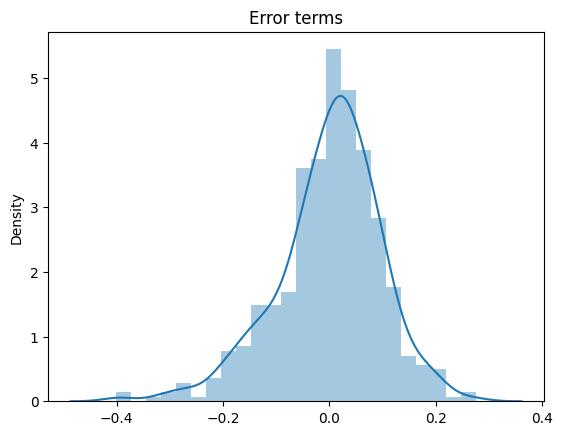

In [40]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)

# distrubition plot for residue
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

Text(0, 0.5, 'Residual')

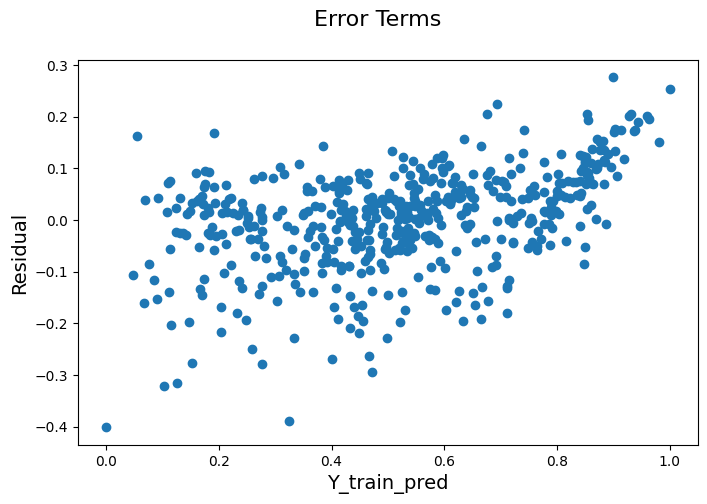

In [41]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))

# Scatter plot
plt.scatter(y_train,res)

# Plot heading 
fig.suptitle('Error Terms', fontsize=16)  

# X-label
plt.xlabel('Y_train_pred', fontsize=14)                      

# Y label
plt.ylabel('Residual', fontsize=14) 

Insights:

 - The error terms seems to have constant variance, i.e., homoscedastiity

## Prediction on test set 

In [42]:
# Data set
rg_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist & Cloudy,weathersit_Light Snow & Rain
583,1,0,1,0.868455,0.827713,0.627290,0.265707,0,1,0,...,0,0,0,1,0,0,0,0,1,0
493,1,0,1,0.662048,0.634223,0.688567,0.545436,1,0,0,...,1,0,0,0,0,0,0,0,1,0
294,0,0,0,0.466335,0.463565,0.514214,0.197559,0,0,1,...,0,0,0,0,0,1,0,0,0,0
157,0,0,1,0.832094,0.771951,0.466836,0.465023,1,0,0,...,0,1,0,0,0,0,0,0,0,0
670,1,0,1,0.379708,0.370630,0.351863,0.685331,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Now that we have removed and dropped the variables with 
 - high p value
 - high VIF value

we can start with the final variables model

In [43]:
# Final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_sep,weathersit_Light Snow & Rain
583,1,0,0.868455,0.265707,0,0,0,0
493,1,0,0.662048,0.545436,1,0,0,0
294,0,0,0.466335,0.197559,0,1,0,0
157,0,0,0.832094,0.465023,1,0,0,0
670,1,0,0.379708,0.685331,0,1,0,0


In [44]:
 #Add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_sep,weathersit_Light Snow & Rain
583,1.0,1,0,0.868455,0.265707,0,0,0,0
493,1.0,1,0,0.662048,0.545436,1,0,0,0
294,1.0,0,0,0.466335,0.197559,0,1,0,0
157,1.0,0,0,0.832094,0.465023,1,0,0,0
670,1.0,1,0,0.379708,0.685331,0,1,0,0


In [45]:
# Predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

##  Evaluate the model on test set 

In [46]:
# Get R-Squared fro test dataset

r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test data set - ', round(r2_test,3))

R-Squared for Test dataset:  0.744


In [47]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.734


In [48]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0116


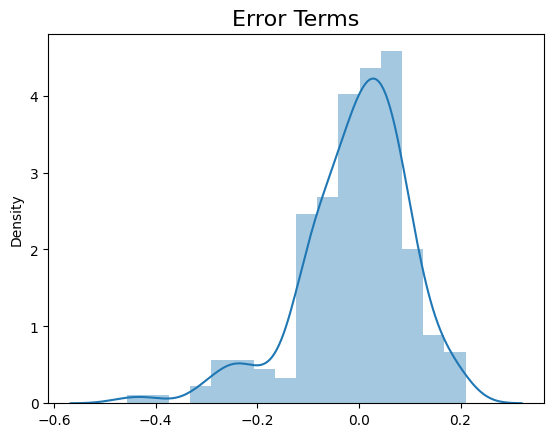

In [49]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

Text(0, 0.5, 'Residual')

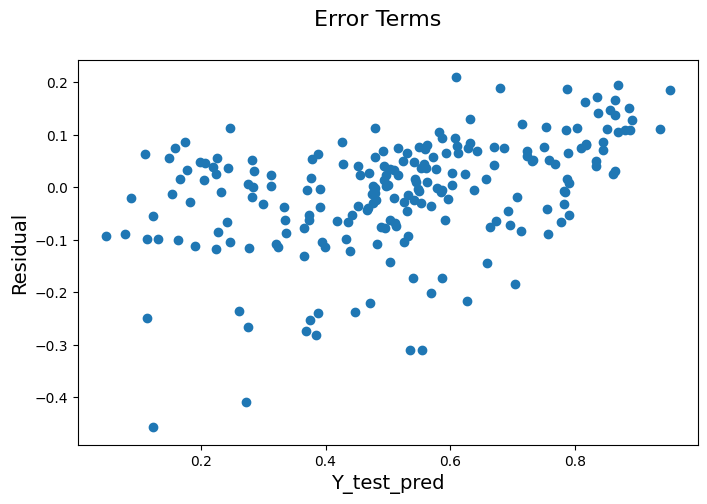

In [50]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))

#Scatter plot
plt.scatter(y_test,res_test)

# Plot heading 
fig.suptitle('Error Terms', fontsize=16)             

# X - label
plt.xlabel('Y_test_pred', fontsize=14)                      

# Y - label
plt.ylabel('Residual', fontsize=14)   

Text(0, 0.5, 'y_test_pred')

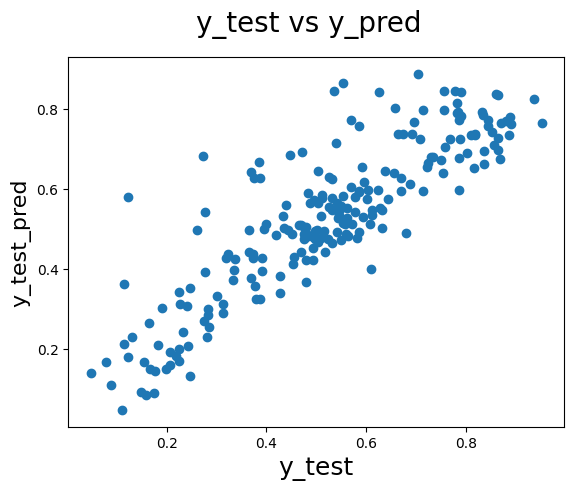

In [51]:
# Plot y_test and y_pred

fig = plt.figure()

#Scatter plot
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)

# X-label
plt.xlabel('y_test', fontsize = 18)                          

# Y-label
plt.ylabel('y_test_pred', fontsize = 16)  

Insights:

 - We can colude that the model lm_5 fit isn't by chance, and has descent predictive power.

# Conclusions

In [52]:
# R-Squared and adj. R-Squared
print('R- Sqaured train: ', round(lm_final.rsquared,2), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

R- Sqaured train:  0.81   Adj. R-Squared train: 0.808
R- Sqaured test :  0.74   Adj. R-Squared test : 0.734

Coefficent for the variables are:
const                           0.077
yr                              0.235
holiday                        -0.082
temp                            0.570
windspeed                      -0.090
season_summer                   0.073
season_winter                   0.127
mnth_sep                        0.090
weathersit_Light Snow & Rain   -0.232
dtype: float64


The equation of fitted line is:

cnt=0.077+(0.235×yr)-(0.082×holiday)+(0.570×temp)−(0.090×windspeed)+(0.073×season_summer)+(0.127×season_winter)+(0.090×mnth_sp)−(0.232×weathersit_Light Snow & Rain)

 - From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 73% of bike demand.
 - Coeffiencients of the variables explains the factors effecting the bike demand

Based on final model top three features contributing significantly towards explaining the demand are:

 - temp (0.570)
 - weathersit_Light Snow & Rain (-0.232)
 - yr (0.235)

We can conclude that the above variables gives utmost importance for planning maximum demand.